<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
print(boston_df.dtypes)

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### For the "Median value of owner-occupied homes" provide a boxplot

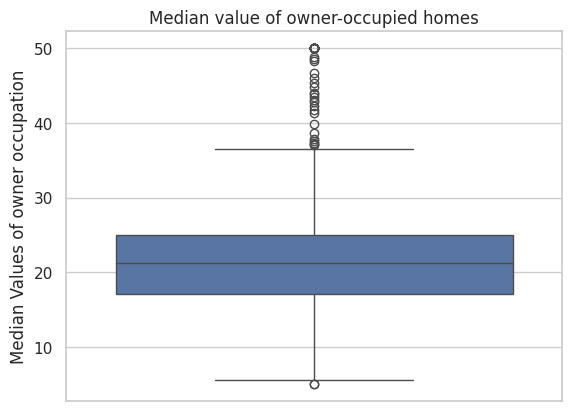

In [40]:
axes = sns.boxplot(y="MEDV",data=boston_df)
axes.set(title="Median value of owner-occupied homes")
axes.set(ylabel="Median Values of owner occupation")
pyplot.show()

#### Provide a  bar plot for the Charles river variable

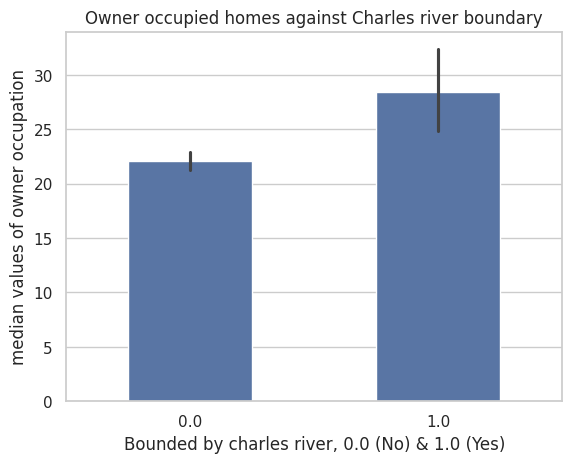

In [65]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV",data=boston_df,width=0.5)
ax.set(title="Owner occupied homes against Charles river boundary")
ax.set(xlabel="Bounded by charles river, 0.0 (No) & 1.0 (Yes)")
ax.set(ylabel="median values of owner occupation")
pyplot.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

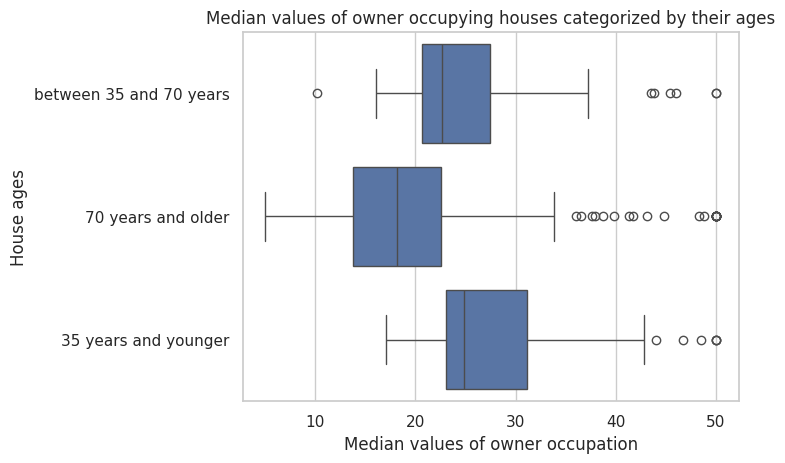

In [45]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
axes = sns.boxplot(x="MEDV",y=boston_df["age_group"],data=boston_df)
axes.set(title="Median values of owner occupying houses categorized by their ages")
axes.set(ylabel="House ages")
axes.set(xlabel="Median values of owner occupation")
pyplot.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

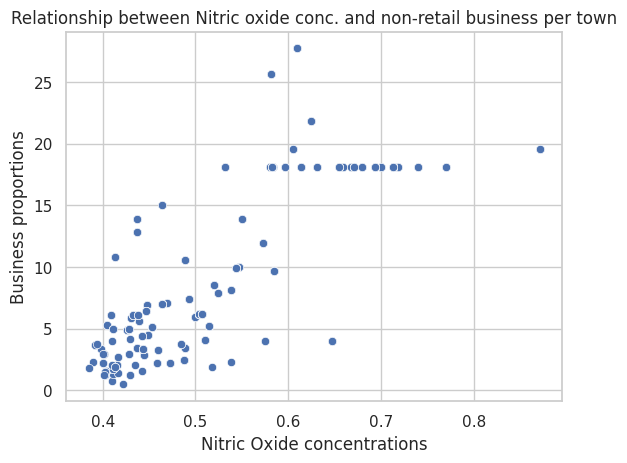

In [46]:
axes = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
axes.set(title="Relationship between Nitric oxide conc. and non-retail business per town")
axes.set(xlabel = "Nitric Oxide concentrations")
axes.set(ylabel="Business proportions")
pyplot.show()

##### Conclusion: the dots tend to cluster around an upward slopping line, this suggests a positive correlation. Meaning if NOX increases so is the INDUS increases.

#### Create a histogram for the pupil to teacher ratio variable

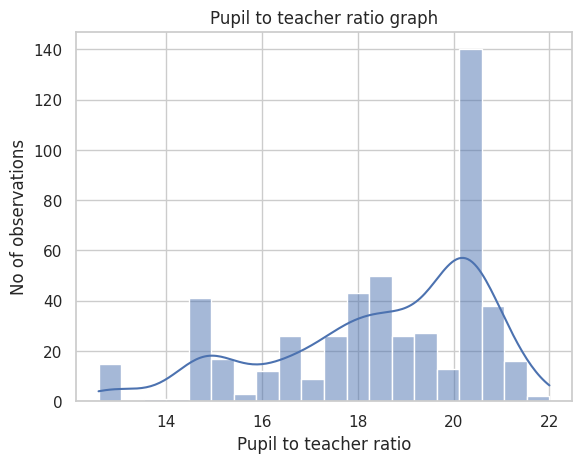

In [58]:
axes = sns.histplot(x='PTRATIO', data=boston_df, kde=True,bins=20)
axes.set(title="Pupil to teacher ratio graph")
axes.set(xlabel="Pupil to teacher ratio")
axes.set(ylabel="No of observations")
pyplot.show()

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   Use α = 0.05
*   $H\_0:$ There is no significant difference in median values of houses bounded by the Charles river.
*   $H\_1:$ There is a difference in median values of houses bounded by the Charles river.

In [59]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value  < 0.05, we reject the Null hypothesis and conclude that there is a impact on median values of houses bounded by the Charles river


### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   Use α = 0.05
*   $H\_0:$ There is no difference in median values of houses built prior to 1940
*   $H\_1:$ There is a difference in median values of houses built prior to 1940

In [60]:
## we will be using same age groups for this question that we created earler for Task 2

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.levene(thirtyfive_lower,
                   thirtyfive_seventy, 
                   seventy_older, 
                   center='mean')
# since the p-value is greater than 0.05, the variance are equal


f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there is a impact on median values of houses built prior to 1940


### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   Use α = 0.05
*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [61]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. Scatter plotted earlier in task2 suggests that the two variables are in a linear relation with positive correlation.


### Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   Use α = 0.05
*   $H_0: β1$ = 0 (Additional weighted distance has no impact on Median values)
*   $H_1: β1$ is not equal to 0 (Additional weighted distance has impact on Median values)

In [62]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        08:42:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** since the p-value is less than 0.05, we reject the null hypothesis as there is evidence that Additional weighted distance has impact on Median values.
Moreover positive coefficient of correlation (1.0916) also suggests that distance has an impact on the median values.